##### <p style="text-align: center;"> ![alt text](./utilities/cilss.png)</p>
# <p style="text-align: center;">AGHRYMET RCC-WAS</p>
#### &copy; Mandela HOUNGNIBO 2024 (Find more [here](https://github.com/hmandela))

## Library

In [1]:
from wass2s import *
import xcast as xc
import importlib
from pathlib import Path
import warnings
import gc
warnings.filterwarnings("ignore")

#### Set forecast working directory

In [2]:
# Set forecast working directory
dir_s2s = "./Agro_PRESASS_2025"

In [3]:
dir_s2s = Path(dir_s2s)
os.makedirs(dir_s2s, exist_ok=True)
### Save consolidated results
hdcst_consolidated = {}
fcst_consolidated = {}
scores_consolidated = {}
### Save score
dir_save_score = f"{dir_s2s}/scores"
os.makedirs(dir_save_score, exist_ok=True)
### Save forecasts
dir_to_forecast = f"{dir_s2s}/forecasts"
os.makedirs(dir_to_forecast, exist_ok=True)

#### Set Climatological Years

In [4]:
# Set Climatological Years
clim_year_start = 1994 #1991
clim_year_end = 2016 #2020
dist_method = "t" # "gamma", "t", "lognormal", "normal", "nonparam"
fcst_labels = ["Early", "Near-Normal", "Late"]

## Download Observation and Process 


#### Load Downloader 

In [5]:
# Load WAS_S2S downloader class
downloader = WAS_Download()

In [6]:
# Filter observation names to identify precipitation-related models
variables_obs = [key for key in downloader.AgroObsName().keys() if "PRCP" in key]

# Specify the directory to save downloaded model data
dir_to_save_Obs = f"{dir_s2s}/Observation"

# Define the observation period (years 1993 to 2016)
year_start = 1991
year_end = 2024

# Set the bounding box for the area of interest (latitude and longitude bounds)
extent_obs = [21, -18, 7, 25]   # [Northern, Western, Southern and Eastern] 

# Specify whether to overwrite existing files when downloading data
force_download = False

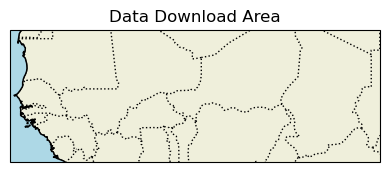

In [7]:
plot_map([extent_obs[1],extent_obs[3],extent_obs[2],extent_obs[0]], title="Data Download Area", fig_size=(4,3))

In [8]:
downloader.WAS_Download_AgroIndicators_daily(dir_to_save_Obs, variables_obs, year_start, year_end, extent_obs, force_download=force_download)
downloader.WAS_Download_AgroIndicators_daily(dir_to_save_Obs, variables_obs, datetime.datetime.now().year, datetime.datetime.now().year, extent_obs, force_download=force_download)

Agro_PRESASS_2025/Observation/Daily_PRCP_1991_2024.nc already exists. Skipping download.
Agro_PRESASS_2025/Observation/Daily_PRCP_2025_2025.nc already exists. Skipping download.


In [9]:
#### Process predictant
rainfall = prepare_predictand(dir_to_save_Obs, variables_obs, year_start, year_end, daily=True, ds=False)
rainfall_for_forecast_year = prepare_predictand(dir_to_save_Obs, variables_obs, datetime.datetime.now().year, datetime.datetime.now().year, daily=True, ds=False)
season_str = agrometparam = "Onset"
season_obs = [datetime.datetime.now().month+1]

## Compute Onset

In [10]:
## Onset criteria
user_criteria = onset_criteria
user_criteria

{1: {'zone_name': 'Sahel200_100mm',
  'start_search': '05-15',
  'cumulative': 15,
  'number_dry_days': 25,
  'thrd_rain_day': 0.85,
  'end_search': '08-15'},
 2: {'zone_name': 'Sahel400_200mm',
  'start_search': '05-01',
  'cumulative': 15,
  'number_dry_days': 20,
  'thrd_rain_day': 0.85,
  'end_search': '07-31'},
 3: {'zone_name': 'Sahel600_400mm',
  'start_search': '03-15',
  'cumulative': 20,
  'number_dry_days': 20,
  'thrd_rain_day': 0.85,
  'end_search': '07-31'},
 4: {'zone_name': 'Soudan',
  'start_search': '03-15',
  'cumulative': 20,
  'number_dry_days': 10,
  'thrd_rain_day': 0.85,
  'end_search': '07-31'},
 5: {'zone_name': 'Golfe_Of_Guinea',
  'start_search': '02-01',
  'cumulative': 20,
  'number_dry_days': 10,
  'thrd_rain_day': 0.85,
  'end_search': '06-15'}}

In [11]:
user_criteria[4]["thrd_rain_day"] = 0.85
user_criteria[5]["thrd_rain_day"] = 0.85

In [ ]:
# load onset class
was_onset = WAS_compute_onset(user_criteria)

##### Compute onset in-situ data

In [12]:
dailydata_file_path = './DATA_These.csv'

In [13]:
df  = pd.read_csv(dailydata_file_path, low_memory=False)
onset_df = was_onset.compute_insitu(df)
onset_df.head()

STATION      ALLADA    APLAHOUE      BONOU        BOPA  COTONOU_AEROPORT  \
0     LAT    6.650000    6.916667   6.933333    6.566667            6.3500   
1     LON    2.133333    1.666667   2.500000    1.966667            2.3833   
2    1981  108.000000  140.000000  82.000000  108.000000          108.0000   
3    1982   75.000000  119.000000  97.000000  119.000000          105.0000   
4    1983  162.000000   91.000000  98.000000  134.000000          134.0000   

   COTONOU_AUTO   GRANDPOPO     NIAOULI  NIAOULI_AUTO  ...      OUIDAH  \
0      6.355555    6.283333    6.700000      6.737957  ...    6.366667   
1      2.383330    1.816667    2.116667      2.140935  ...    2.100000   
2   -999.000000  121.000000  108.000000   -999.000000  ...  108.000000   
3   -999.000000   97.000000   75.000000   -999.000000  ...   37.000000   
4   -999.000000  134.000000   98.000000   -999.000000  ...  128.000000   

   OUIDAH_AUTO   PORTONOVO  SEKOU_AUTO  SEMECOCOTIER  SEMEKPODJI  \
0        6.367    6.483333    6.616667      6.366677    6.366687   
1        1.980    2.616667    2.233333      2.600000    2.633333   
2     -999.000   69.000000 -999.000000   -999.000000  108.000000   
3     -999.000  105.000000 -999.000000   -999.000000   97.000000   
4     -999.000  128.000000 -999.000000   -999.000000  133.000000   

   SEME_COCOTIER_AUTO       TOFFO  TOFFO_AUTO    UAC_AUTO  
0            6.396839    6.833333    6.824885    6.414164  
1            2.581307    2.050000    2.186538    2.339944  
2         -999.000000  141.000000 -999.000000 -999.000000  
3         -999.000000   75.000000 -999.000000 -999.000000  
4         -999.000000   99.000000 -999.000000 -999.000000  

[5 rows x 21 columns]

##### Compute onset for gridded products

In [14]:
onset = was_onset.compute(daily_data=rainfall, nb_cores=4)

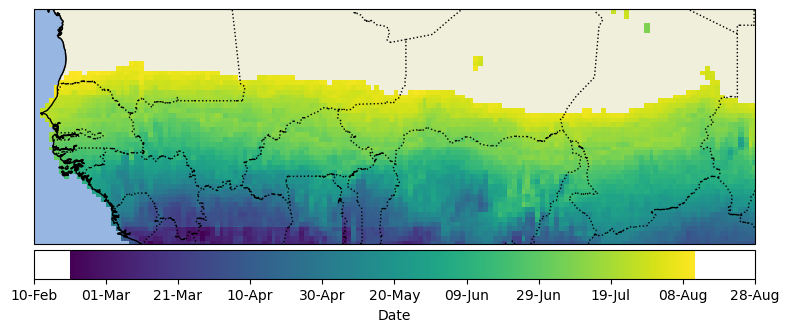

In [15]:
plot_date(onset.mean(dim='T'))

#### Process Onset in combining with Ground-Observation

In [16]:
# ## Path to the CPT file
# cpt_input_file_path = "./Observation/MAM_1991-2023_.txt"

In [17]:
## Read CSV
# df = pd.read_csv(cpt_input_file_path, na_values=-999.0, sep='\t')
# df_filtered = df[(df['STATION'] == 'LAT') | (df['STATION'] == 'LON') | 
#                  (pd.to_numeric(df['STATION'], errors='coerce').between(year_start, year_end))]

In [18]:
# da = prepare_predictand(dir_to_save_Obs, variables_obs, year_start, year_end, season_obs,  ds=False).sel(T=slice(year_start,year_end))
# ## Instantiate WAS_Merging class
# data_merger = WAS_Merging(df_filtered, da, date_month_day= '04-01')
# rainfall, _ = data_merger.simple_bias_adjustment(do_cross_validation=False)

In [19]:
## Instantiate WAS_Merging class
data_merger = WAS_Merging(onset_df, onset, date_month_day= '02-01')
onset__, _ = data_merger.simple_bias_adjustment(do_cross_validation=False)

In [20]:
# data_merger.plot_merging_comparaison(onset_df, onset , onset__)

# 1st - Approach: Choice of Best Dynamical models and weighted Average

In [21]:
# Filter model names to identify precipitation-related models
#'UKMO_603.PRCP', 
center_variable = ['ECMWF_51.PRCP', 'METEOFRANCE_8.PRCP', 'DWD_21.PRCP',
                   'CMCC_35.PRCP','ECCC_4.PRCP', 'ECCC_5.PRCP',
                   'JMA_3.PRCP',
                   'NCEP_2.PRCP'] #[key for key in downloader.ModelsName().keys() if "PRCP" in key]

# Specify the directory to save downloaded model data
dir_to_save_model = f"{dir_s2s}/daily_model_data"

# Define the month for model initialization (June)
month_of_initialization = "03"
day_of_initialization ="01"

# Define lead times corresponding to seasonal forecast targets
leadtime_hour = [str(i) for i in range(24, 5161, 24)] 

# Define the hindcast period for model data (years 1993 to 2016)
year_start_model = 1993
year_end_model = 2016

# Set the bounding box for the area of interest (latitude and longitude bounds)
extent_obs = [21, -18, 7, 25]  # [Northern, Western, Southern and Eastern] 

# Define if you want to download forecast or hindcast
forecast = None
ensemble_mean = 'mean',
# Specify whether to overwrite existing files when downloading data
force_download = False

In [22]:
file_path_hdcst = downloader.WAS_Download_Models_Daily(dir_to_save_model,center_variable,month_of_initialization, day_of_initialization, leadtime_hour, year_start_model, year_end_model, extent_obs, forecast, ensemble_mean, force_download,)

Agro_PRESASS_2025/daily_model_data/hindcast_ecmwf51_PRCP_Mar01_1993_2016_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/hindcast_meteo_france8_PRCP_Mar01_1993_2016_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/hindcast_dwd21_PRCP_Mar01_1993_2016_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/hindcast_cmcc35_PRCP_Mar01_1993_2016_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/hindcast_eccc4_PRCP_Mar01_1993_2016_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/hindcast_eccc5_PRCP_Mar01_1993_2016_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/hindcast_jma3_PRCP_Mar01_1993_2016_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/hindcast_ncep2_PRCP_Mar01_1993_2016_24-5160.nc already exists. Skipping download.


In [23]:
forecast = 2025

In [24]:
file_path_fcst = downloader.WAS_Download_Models_Daily(dir_to_save_model,center_variable,month_of_initialization, day_of_initialization, leadtime_hour, year_start_model, year_end_model, extent_obs, forecast, ensemble_mean, force_download,)

Agro_PRESASS_2025/daily_model_data/forecast_ecmwf51_PRCP_Mar01_2025_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/forecast_meteo_france8_PRCP_Mar01_2025_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/forecast_dwd21_PRCP_Mar01_2025_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/forecast_cmcc35_PRCP_Mar01_2025_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/forecast_eccc4_PRCP_Mar01_2025_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/forecast_eccc5_PRCP_Mar01_2025_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/forecast_jma3_PRCP_Mar01_2025_24-5160.nc already exists. Skipping download.
Agro_PRESASS_2025/daily_model_data/forecast_ncep2_PRCP_Mar01_2025_24-5160.nc already exists. Skipping download.


In [52]:
hindcast_files, forecast_files = process_model_for_other_params(was_onset, dir_s2s, file_path_hdcst, file_path_fcst, rainfall, 
rainfall_for_forecast_year, month_of_initialization, year_start_model, year_end_model, forecast, nb_cores=2, agrometparam=agrometparam)

[SKIP] Agro_PRESASS_2025/model_data/hindcast_ecmwf51_Onset_MarIc.nc already exists.
[SKIP] Agro_PRESASS_2025/model_data/hindcast_meteo_france8_Onset_MarIc.nc already exists.
[SKIP] Agro_PRESASS_2025/model_data/hindcast_dwd21_Onset_MarIc.nc already exists.
[SKIP] Agro_PRESASS_2025/model_data/hindcast_cmcc35_Onset_MarIc.nc already exists.
[SKIP] Agro_PRESASS_2025/model_data/hindcast_eccc4_Onset_MarIc.nc already exists.
[SKIP] Agro_PRESASS_2025/model_data/hindcast_eccc5_Onset_MarIc.nc already exists.
[SKIP] Agro_PRESASS_2025/model_data/hindcast_jma3_Onset_MarIc.nc already exists.
[SKIP] Agro_PRESASS_2025/model_data/hindcast_ncep2_Onset_MarIc.nc already exists.
[SKIP] Agro_PRESASS_2025/model_data/forecast_ecmwf51_Onset_MarIc.nc already exists.
[SKIP] Agro_PRESASS_2025/model_data/forecast_meteo_france8_Onset_MarIc.nc already exists.
[SKIP] Agro_PRESASS_2025/model_data/forecast_dwd21_Onset_MarIc.nc already exists.
[SKIP] Agro_PRESASS_2025/model_data/forecast_cmcc35_Onset_MarIc.nc already exi

In [26]:
was_verify = WAS_Verification(dist_method=dist_method)

#### Validation of GCM

In [27]:
score = ["Pearson", "MAE", "GROC"]

Pearson Correlation


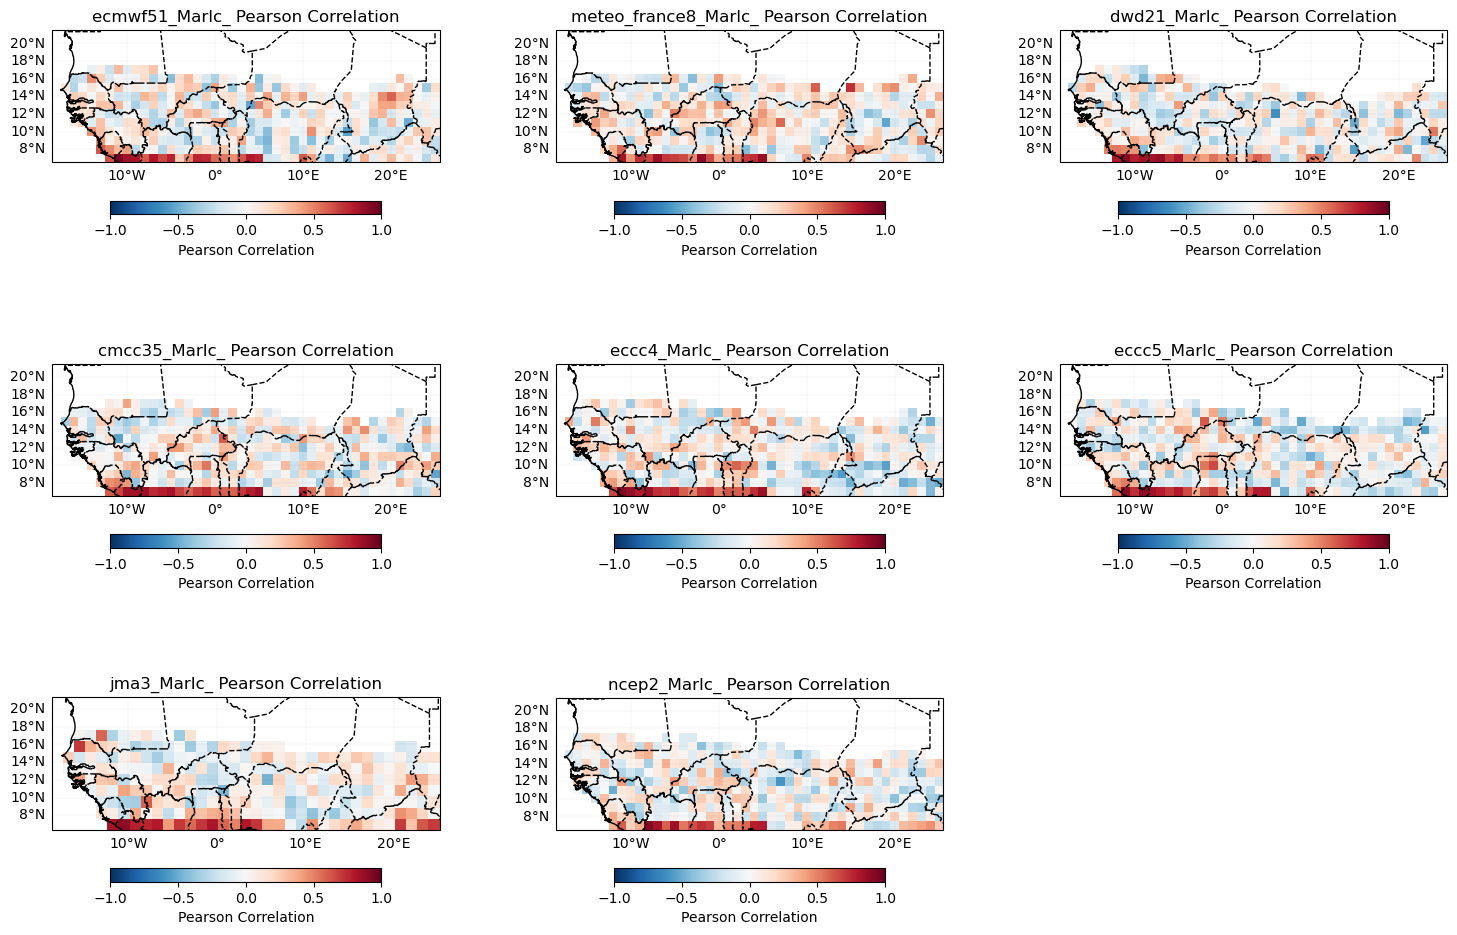

Mean Absolute Error


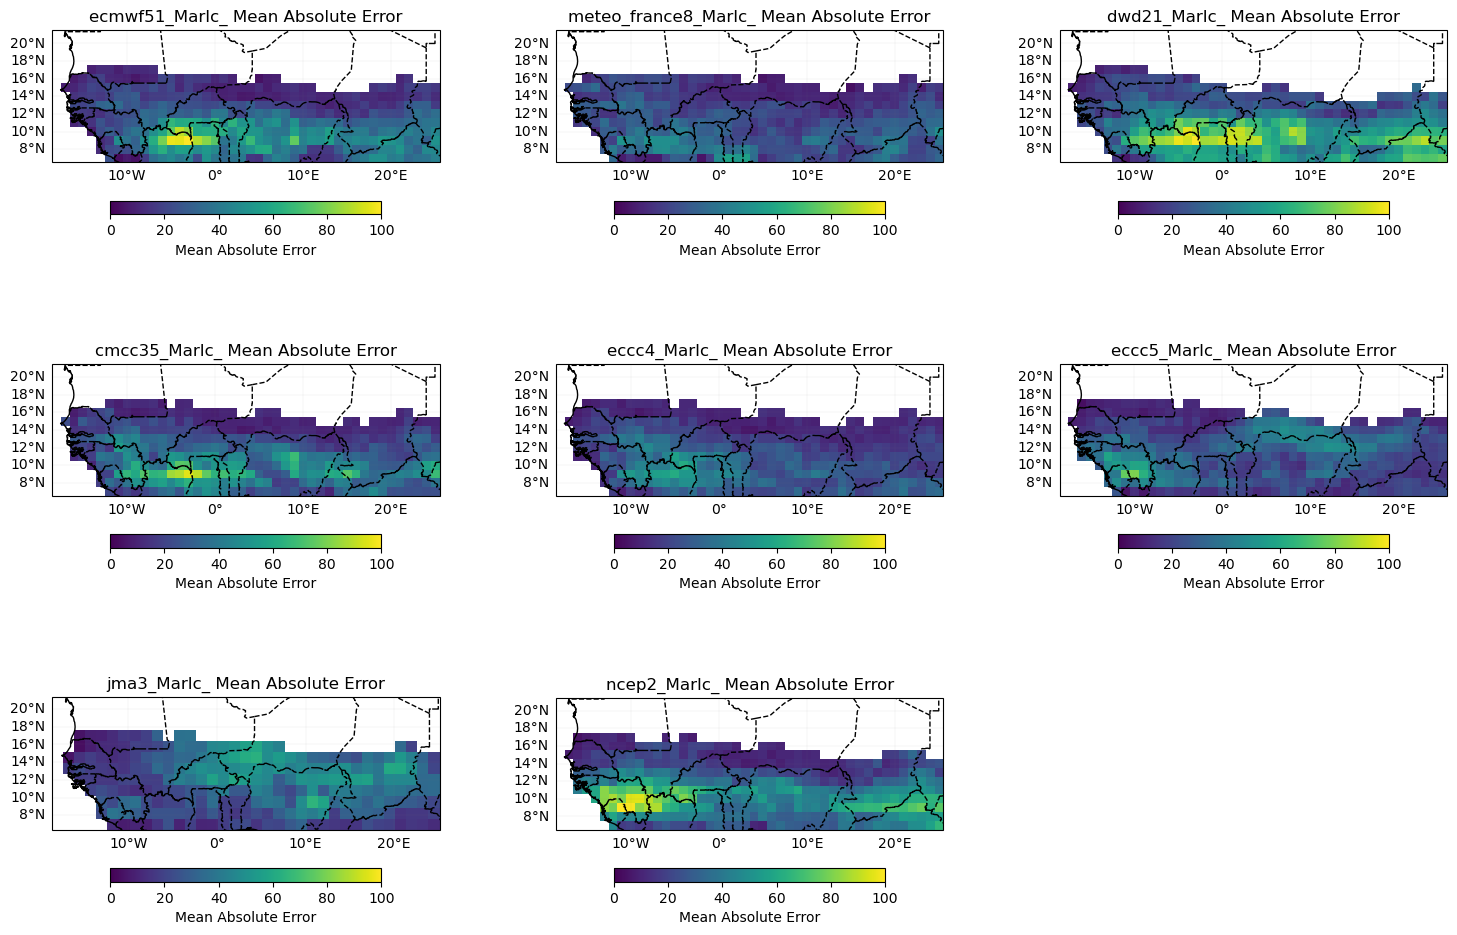

Generalized Discrimination Score


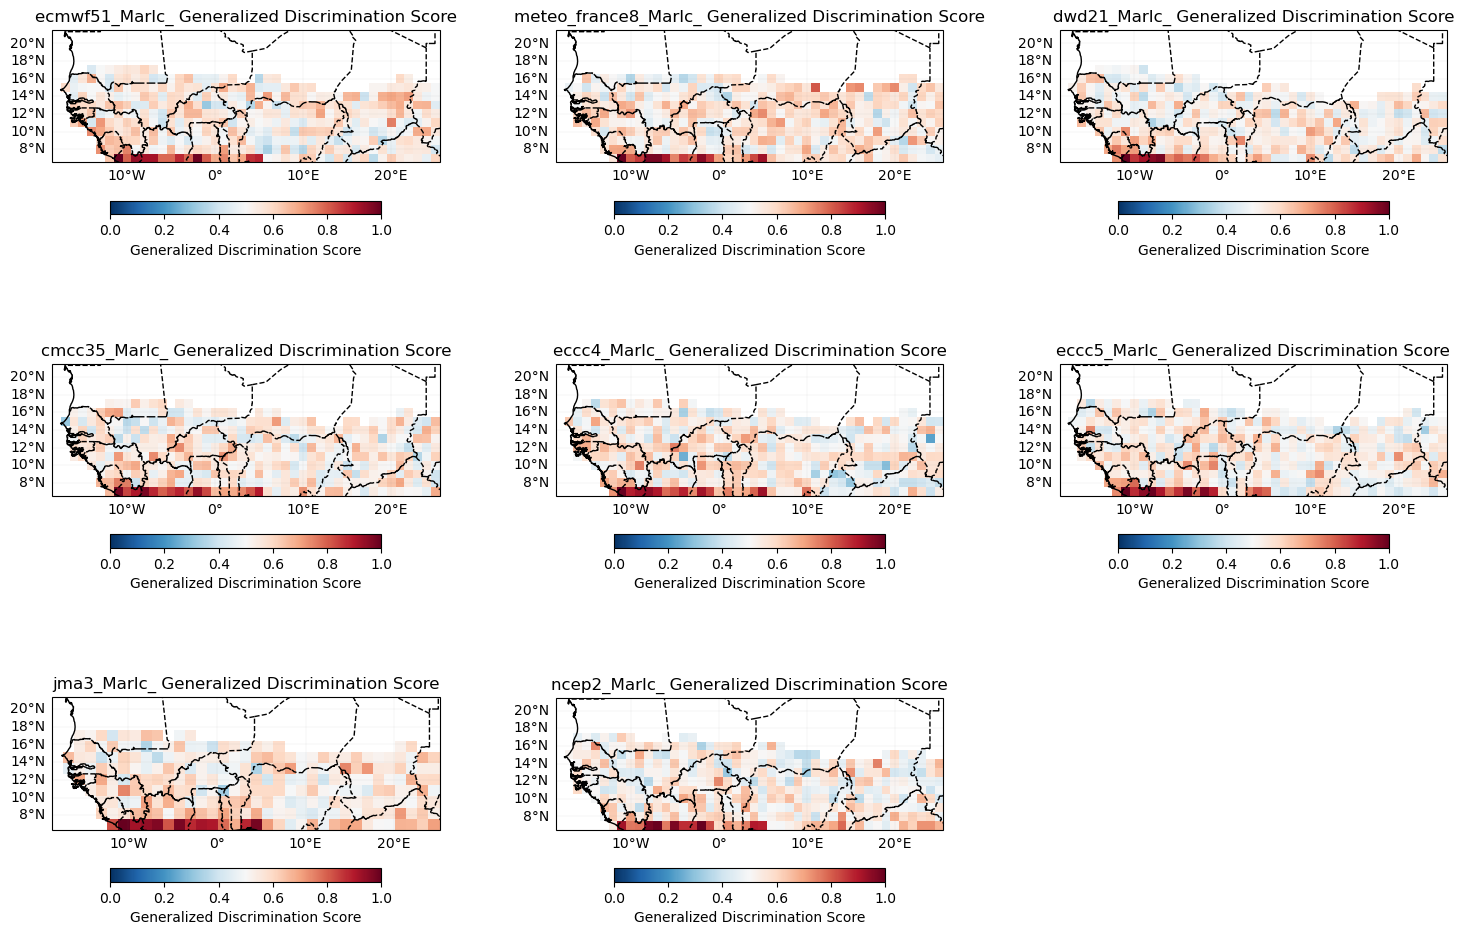

In [28]:
score = score.append('GROC') if 'GROC' not in score else score
os.makedirs(dir_save_score, exist_ok=True)
scores = {}
for i in score:
    scores[i] = was_verify.gcm_validation_compute(hindcast_files, onset, i, month_of_initialization, clim_year_start, clim_year_end, dir_save_score, lead_time = None, ensemble_mean=None, gridded=True)
    print(was_verify.scores[i][0])
    was_verify.plot_models_score(scores[i], i, dir_save_score)

## Choice of best GCM models

In [29]:
best_models = get_best_models(center_variable, scores, metric='MAE', threshold=25, top_n=4, agroparam=True, gcm=False)
best_models

['ECCC_4.PRCP', 'METEOFRANCE_8.PRCP', 'ECCC_5.PRCP', 'ECMWF_51.PRCP']

## MME for best GCM models

In [32]:
hidden_layer_sizes=(4,)
activation='relu'
max_iter=200
solver='adam'
alpha=0.1
random_state=42
dist_method=dist_method

model = WAS_mme_MLP(hidden_layer_sizes=hidden_layer_sizes,
                                    activation=activation,
                                    max_iter=max_iter,
                                    solver=solver,
                                    alpha=alpha,
                                    random_state=random_state,
                                    dist_method=dist_method)

#### Cross-validation

In [33]:
%load_ext autoreload
%autoreload 2

In [34]:
all_model_hdcst, all_model_fcst, obs, best_score = process_datasets_for_mme(onset.sel(T=slice(str(year_start_model),str(year_end_model))), hdcsted=hindcast_files, fcsted=forecast_files, scores= scores, gcm=False, agroparam=True, ELM_ELR=False, best_models=best_models)

In [35]:
was_mme_gcm = WAS_Cross_Validator(n_splits=len(onset.sel(T=slice(str(year_start_model),str(year_end_model))).get_index("T")), nb_omit=2)

In [36]:
hindcast_det_gcm, hindcast_prob_gcm, = was_mme_gcm.cross_validate(model, obs, all_model_hdcst, clim_year_start, clim_year_end)
hdcst_consolidated['first.approach'] = hindcast_det_gcm

Cross-validation ongoing


100%|███████████████████████████████████████████| 24/24 [03:34<00:00,  8.96s/it]


#### Verification

In [37]:
score = ['Pearson','MAE']
model_name = "MME_best_GCM_Models"

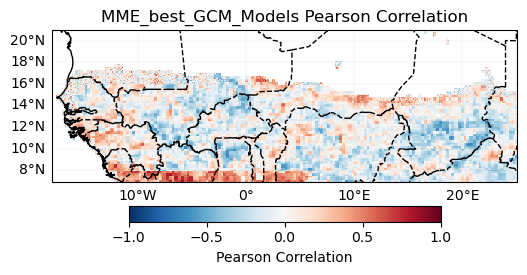

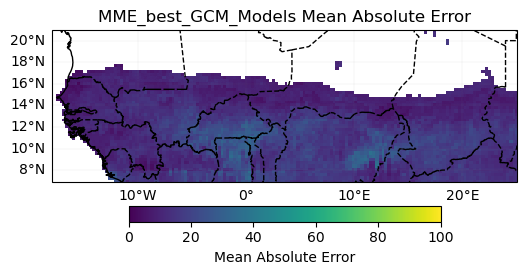

In [38]:
for i in score:
    r = was_verify.compute_deterministic_score(
        was_verify.get_scores_metadata()[i][5],
        onset.sel(T=slice(str(year_start_model),str(year_end_model))),
        hindcast_det_gcm
    )
    scores_consolidated[i] = {'first.approach': r}
    was_verify.plot_model_score(r, i, dir_save_score, model_name)

##### Probabilistic

In [39]:
score = ['GROC']

Generalized Discrimination Score


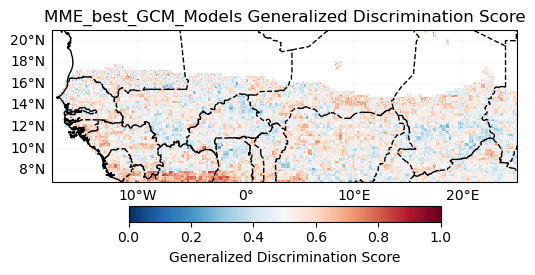

In [40]:
score = score.append('GROC') if 'GROC' not in score else score
for i in score:
    print(was_verify.scores[i][0])
    r = was_verify.compute_probabilistic_score(
        was_verify.get_scores_metadata()[i][5],
        onset.sel(T=slice(str(year_start_model),str(year_end_model))),
        hindcast_prob_gcm,
        clim_year_start,
        clim_year_end)
    scores_consolidated[i] = {'first.approach': r}
    was_verify.plot_model_score(r, i, dir_save_score, model_name)

#### Forecast 

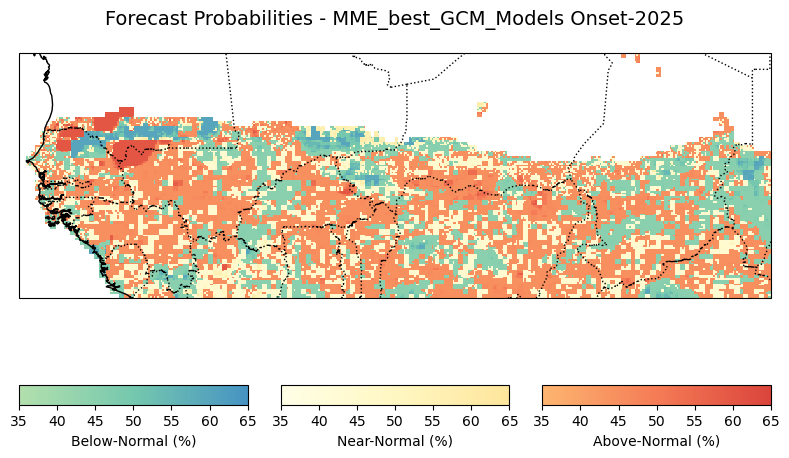

136262

In [41]:
forecast_det_gcm, forecast_prob_gcm= model.forecast(obs, clim_year_start, clim_year_end, all_model_hdcst, hindcast_det_gcm, all_model_fcst)
fcst_consolidated['first.approach'] = forecast_det_gcm
plot_prob_forecasts(dir_to_forecast, forecast_prob_gcm.drop_vars('T').squeeze(), f"{model_name} {season_str}-{forecast}", reverse_cmap=True, labels=fcst_labels)
gc.collect()

# 2nd - Approach: Statistico-Dynamical

In [42]:
# Filter model names to identify precipitation-related models
center_variable = ['ECMWF_51.VGRD_850', 'UKMO_603.VGRD_850', 'METEOFRANCE_8.VGRD_850',
                   'DWD_21.VGRD_850','CMCC_35.VGRD_850', 'ECCC_4.VGRD_850', 'ECCC_5.VGRD_850',
                   'JMA_3.VGRD_850', 'NCEP_2.VGRD_850']

# center_variable = [key for key in downloader.ModelsName().keys() if "VGRD_850" in key]
center_variable.remove('UKMO_603.VGRD_850')


# Specify the directory to save downloaded model data
dir_to_save_model = f"{dir_s2s}/model_data"

# Define the month for model initialization (June)
month_of_initialization = "03"

# Define lead times corresponding to seasonal forecast targets (JAS season in this case)
lead_time = ["01", "02", "03"]  # July-August-September forecast period

# Define the hindcast period for model data (years 1993 to 2016)
year_start_model = 1993
year_end_model = 2016

# Set the bounding box for the area of interest (latitude and longitude bounds)
extent = [30, -30, -20, 30] #[60, -180, -60, 180]  # [Northern, Western, Southern and Eastern] 

# Define if you want to download forecast or hindcast
forecast = None

# Define if you want all members of ensemble or doing an ensemble mean
ensemble_mean = "mean"

# Specify whether to overwrite existing files when downloading data
force_download = False

In [43]:
hindcast_files = downloader.WAS_Download_Models(
    dir_to_save_model,
    center_variable,
    month_of_initialization,
    lead_time,
    year_start_model,
    year_end_model,
    extent, 
    forecast,
    ensemble_mean,
    force_download)

Agro_PRESASS_2025/model_data/hindcast_ecmwf51_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/hindcast_meteofrance8_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/hindcast_dwd21_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/hindcast_cmcc35_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/hindcast_eccc4_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/hindcast_eccc5_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/hindcast_jma3_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/hindcast_ncep2_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.


In [44]:
forecast = 2025

In [45]:
forecast_files = downloader.WAS_Download_Models(
    dir_to_save_model,
    center_variable,
    month_of_initialization,
    lead_time,
    year_start_model,
    year_end_model,
    extent, 
    forecast,
    ensemble_mean,
    force_download)

Agro_PRESASS_2025/model_data/forecast_ecmwf51_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/forecast_meteofrance8_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/forecast_dwd21_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/forecast_cmcc35_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/forecast_eccc4_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/forecast_eccc5_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/forecast_jma3_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.
Agro_PRESASS_2025/model_data/forecast_ncep2_VGRD_850_MarIc_AprMayJun_01.nc already exists. Skipping download.


### Initialize the WAS_CCA class (default)

In [46]:
n_modes = 4
# define zone as dict : {'zone_name_key': ('Explicit_Zone_name', lon_min, lon_max, lat_min, lat_max)} 
defined_zone = {'A': ('A', -30, 30, -20, 30)} 

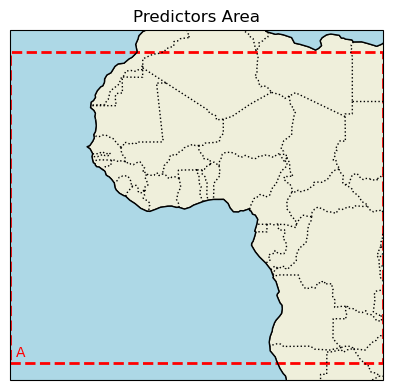

In [47]:
plot_map([extent[1],extent[3],extent[2],extent[0]], sst_indices = defined_zone, title="Predictors Area",fig_size=(6,4))

##### Modes of CCA for each model

In [48]:
was_cca = WAS_CCA(n_modes=n_modes, n_pca_modes=10, dist_method=dist_method)
was_cv = WAS_Cross_Validator(n_splits=len(onset.sel(T=slice(str(year_start_model),str(year_end_model))).get_index("T")), nb_omit=2)

CCA Modes for model ECMWF_51.VGRD_850


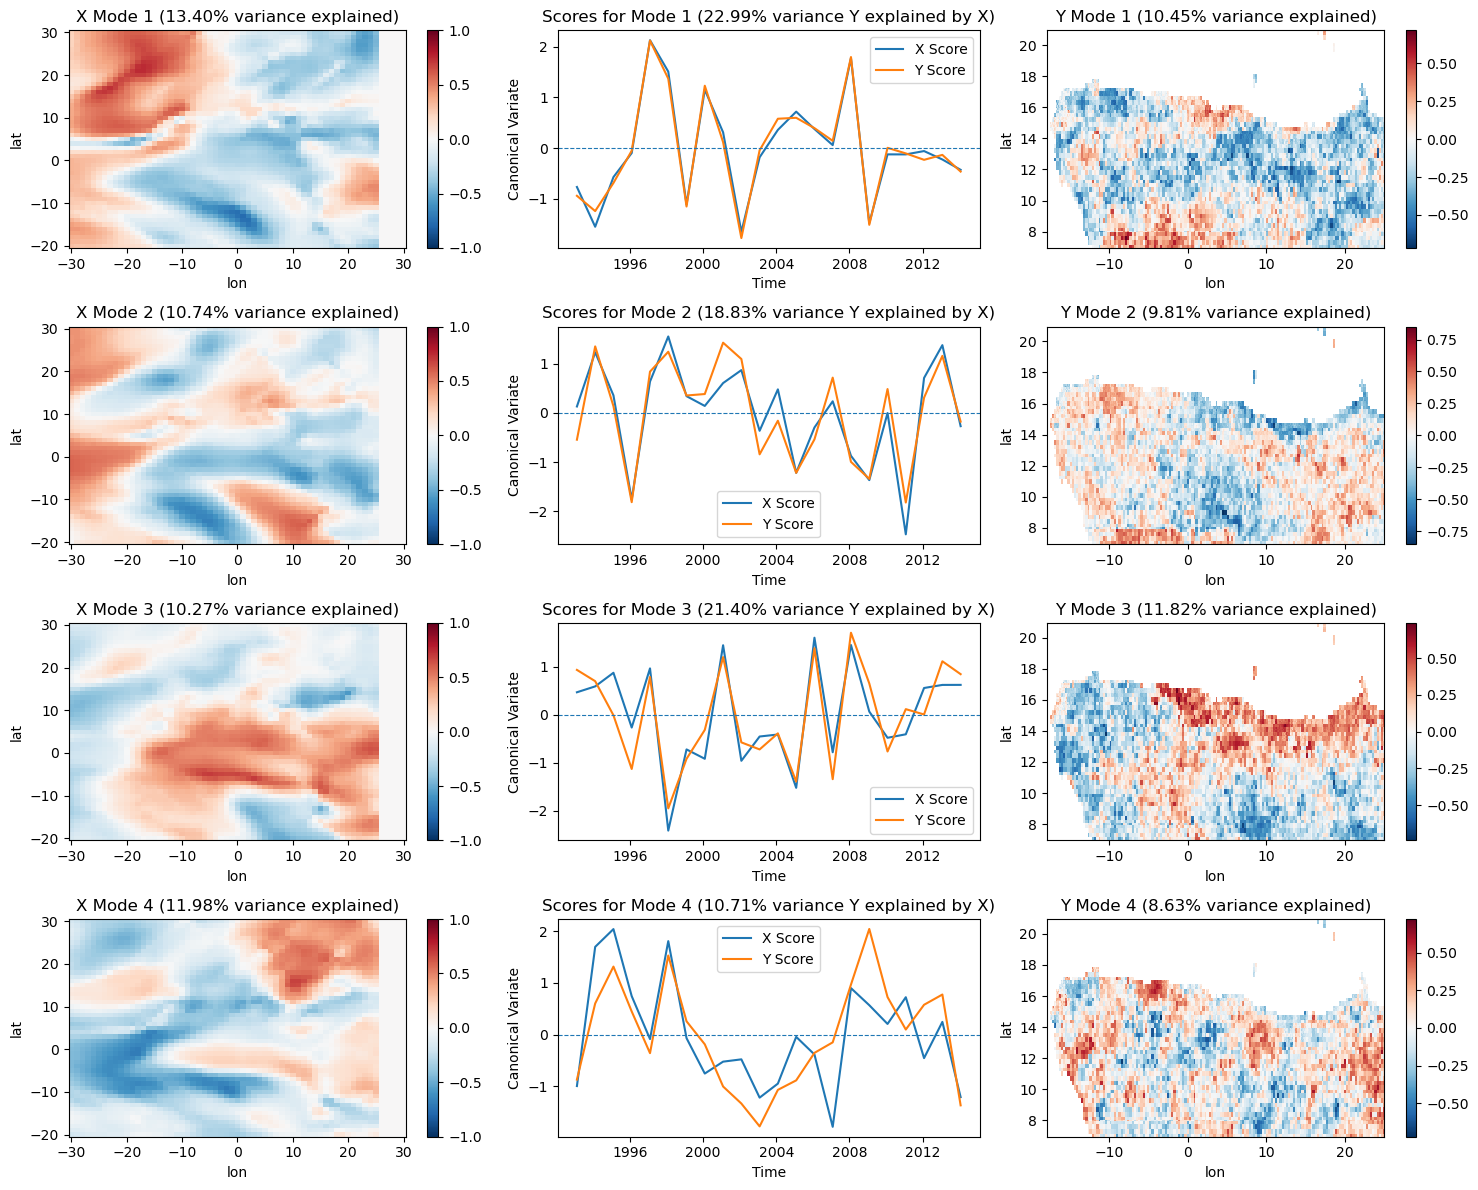

CCA Modes for model METEOFRANCE_8.VGRD_850


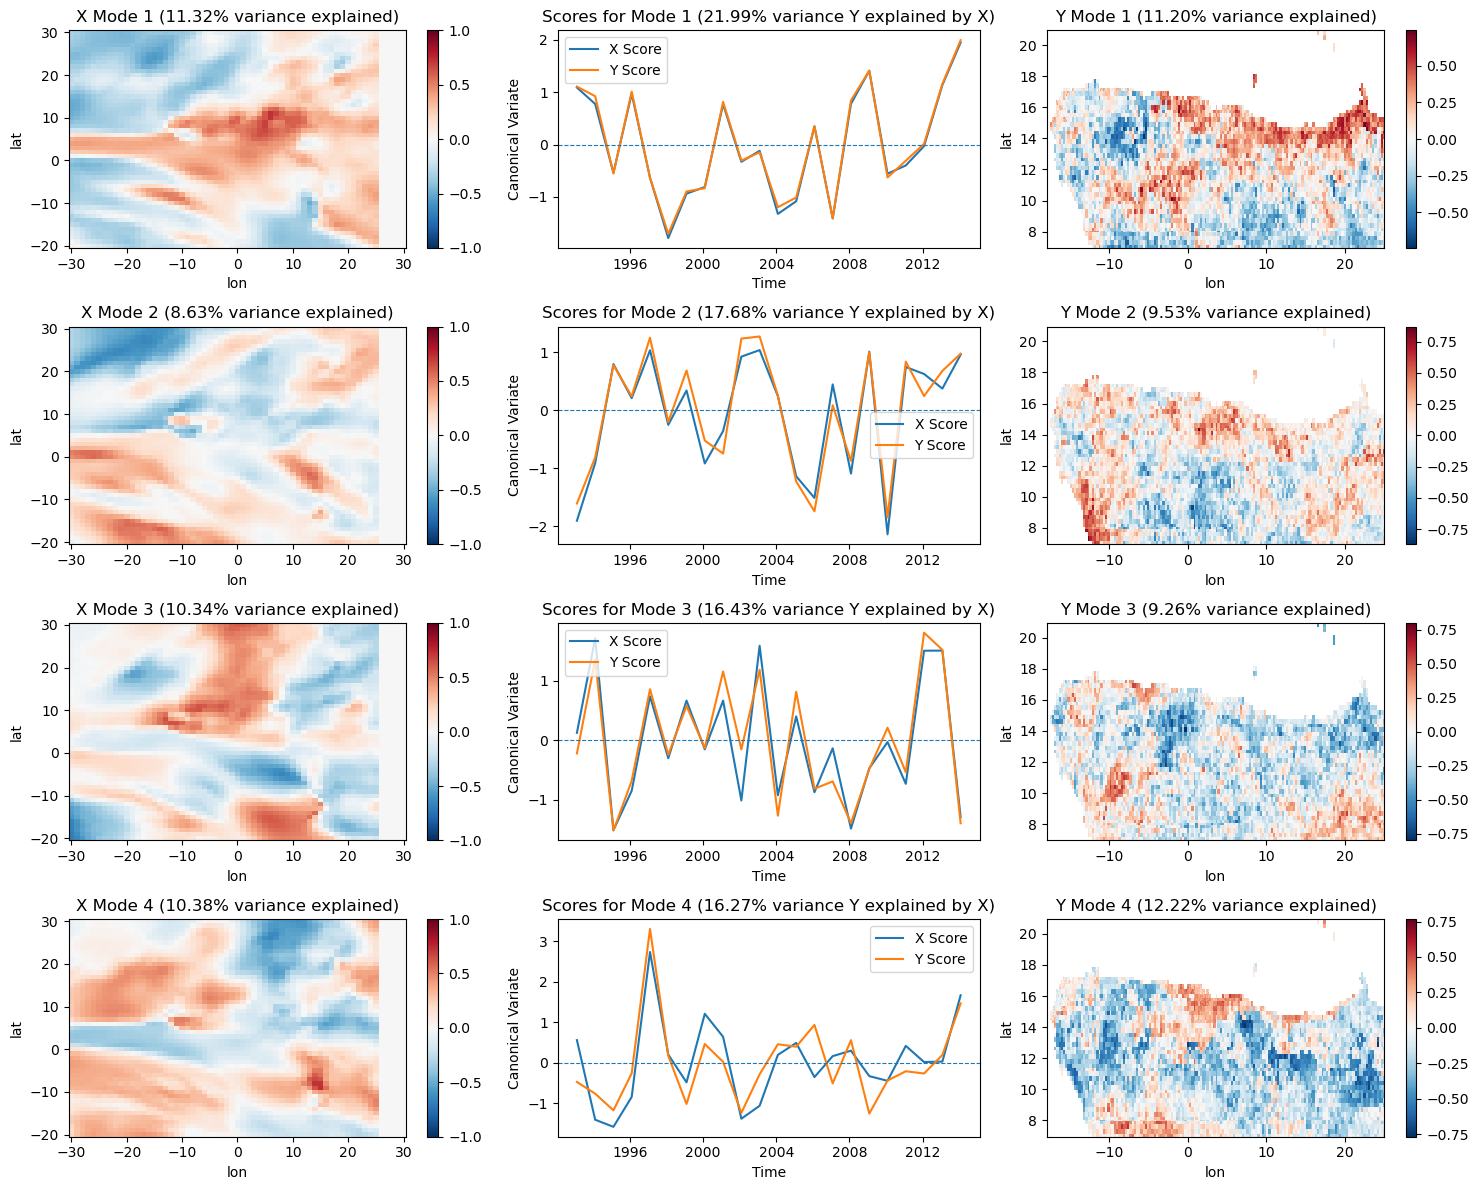

CCA Modes for model DWD_21.VGRD_850


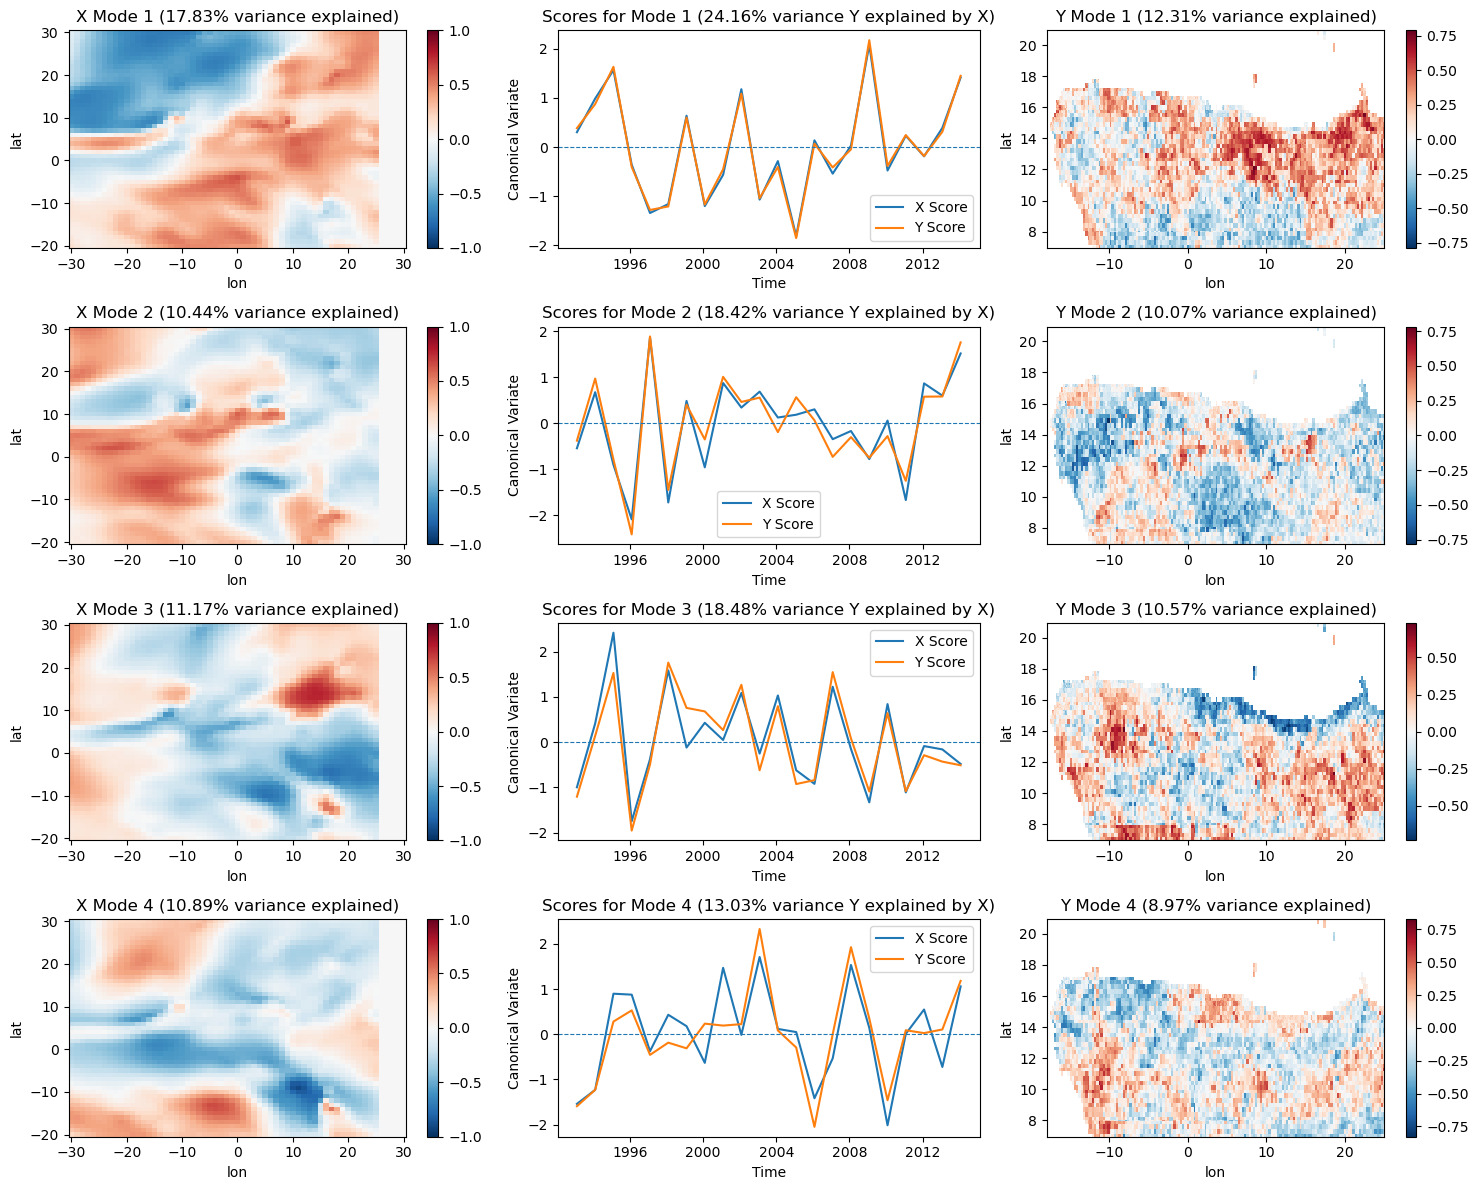

CCA Modes for model CMCC_35.VGRD_850


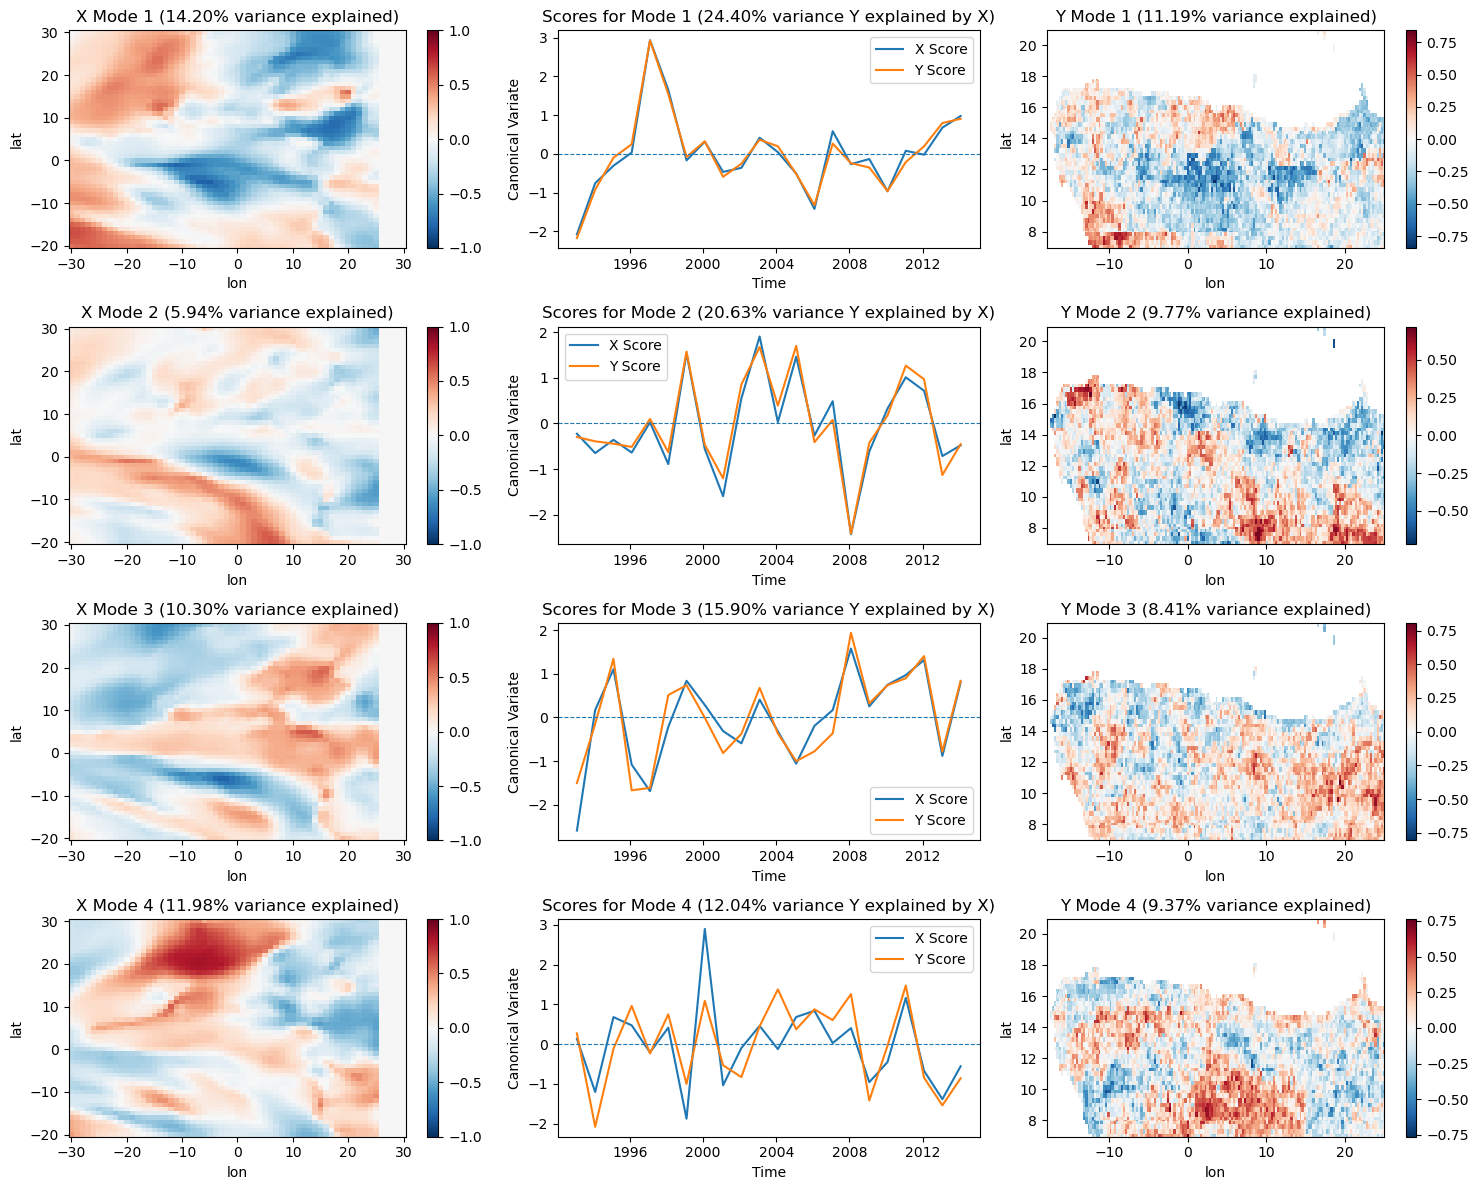

CCA Modes for model ECCC_4.VGRD_850


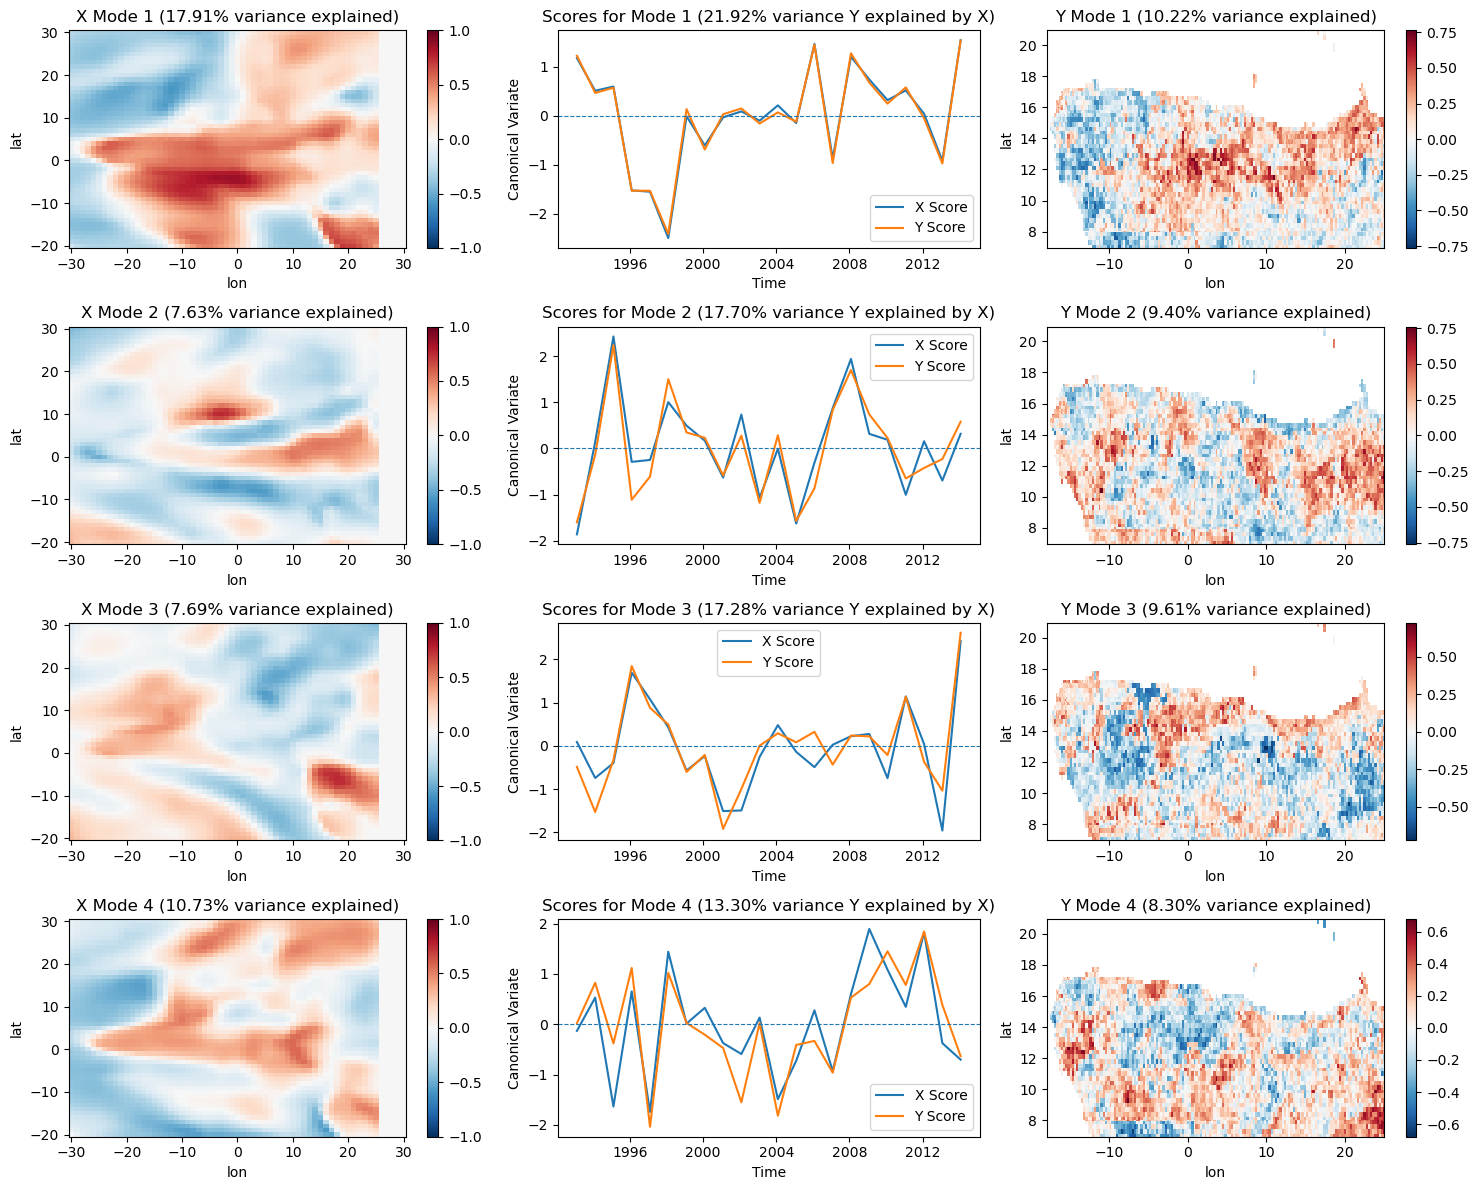

CCA Modes for model ECCC_5.VGRD_850


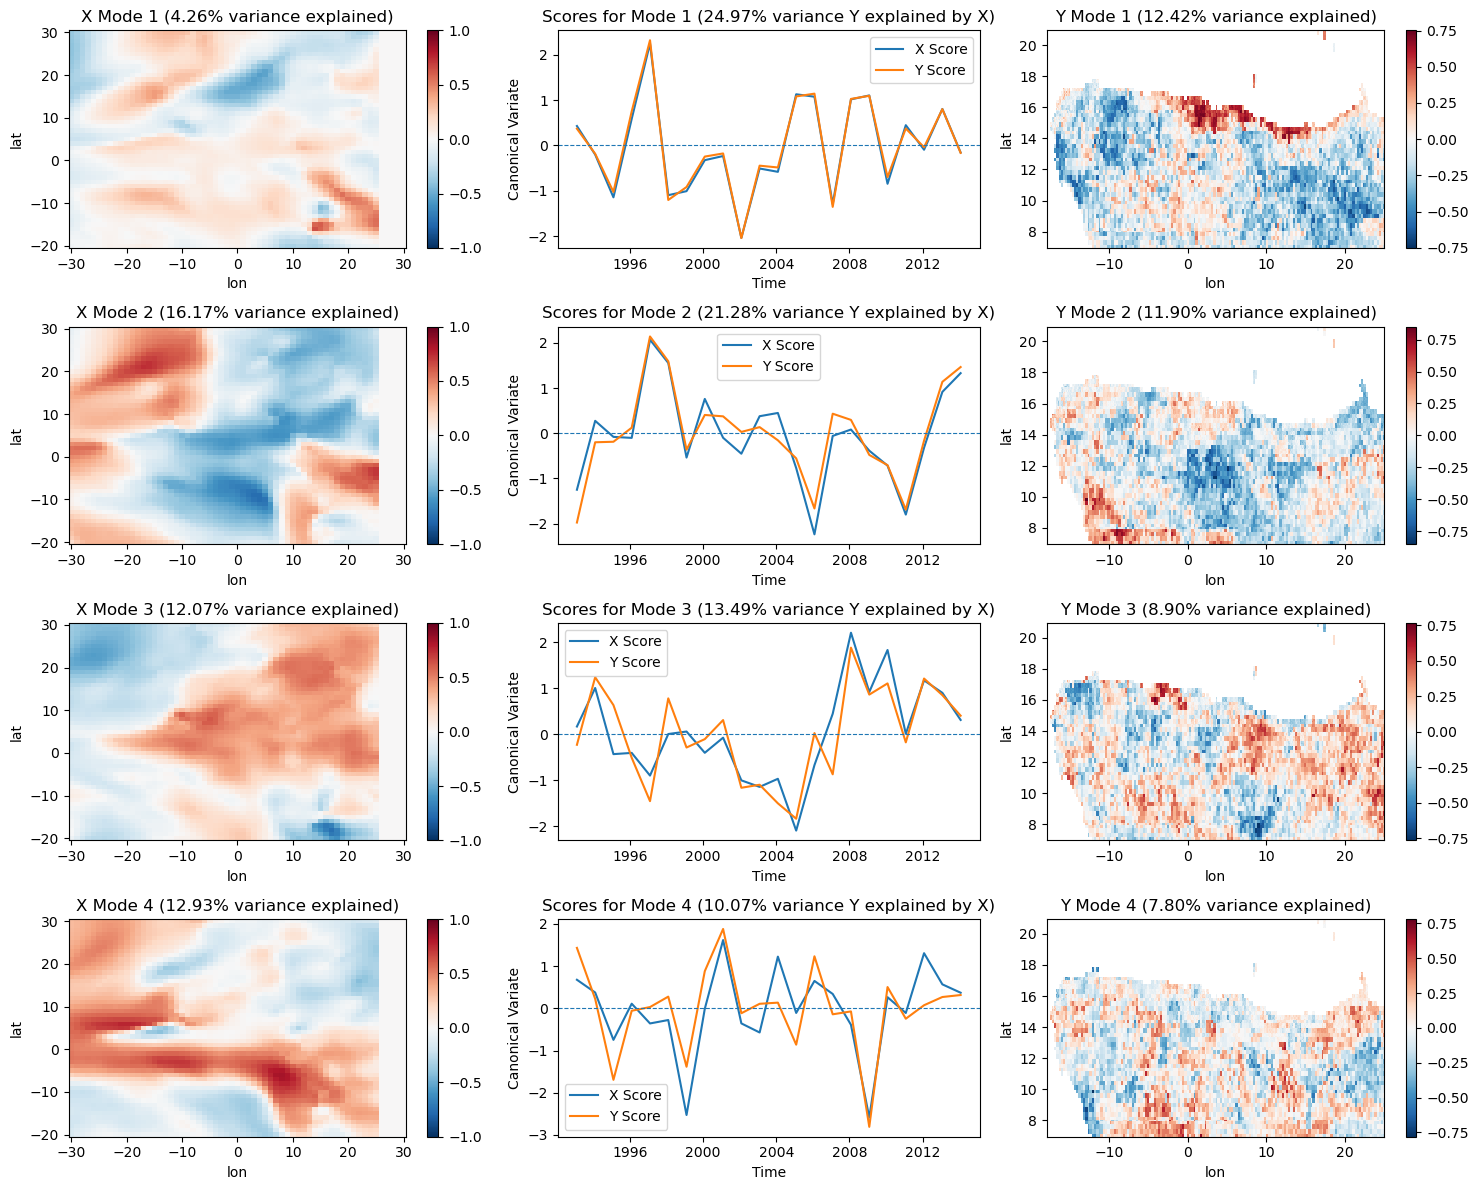

CCA Modes for model JMA_3.VGRD_850


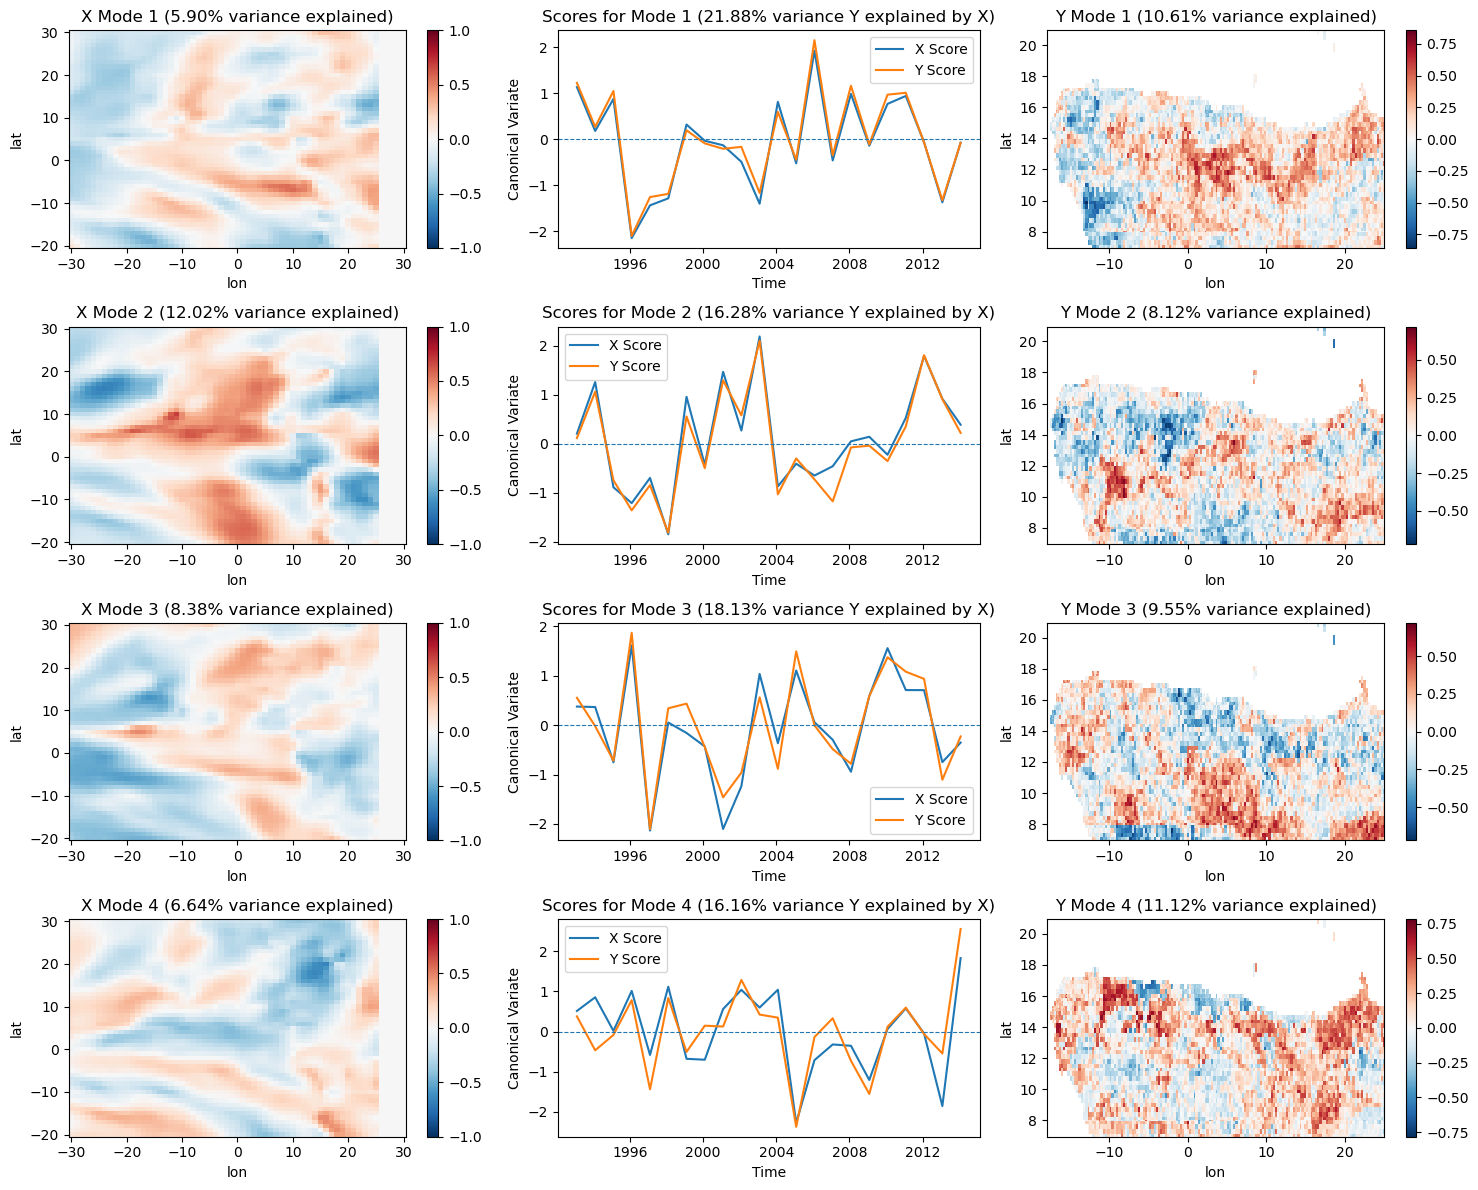

CCA Modes for model NCEP_2.VGRD_850


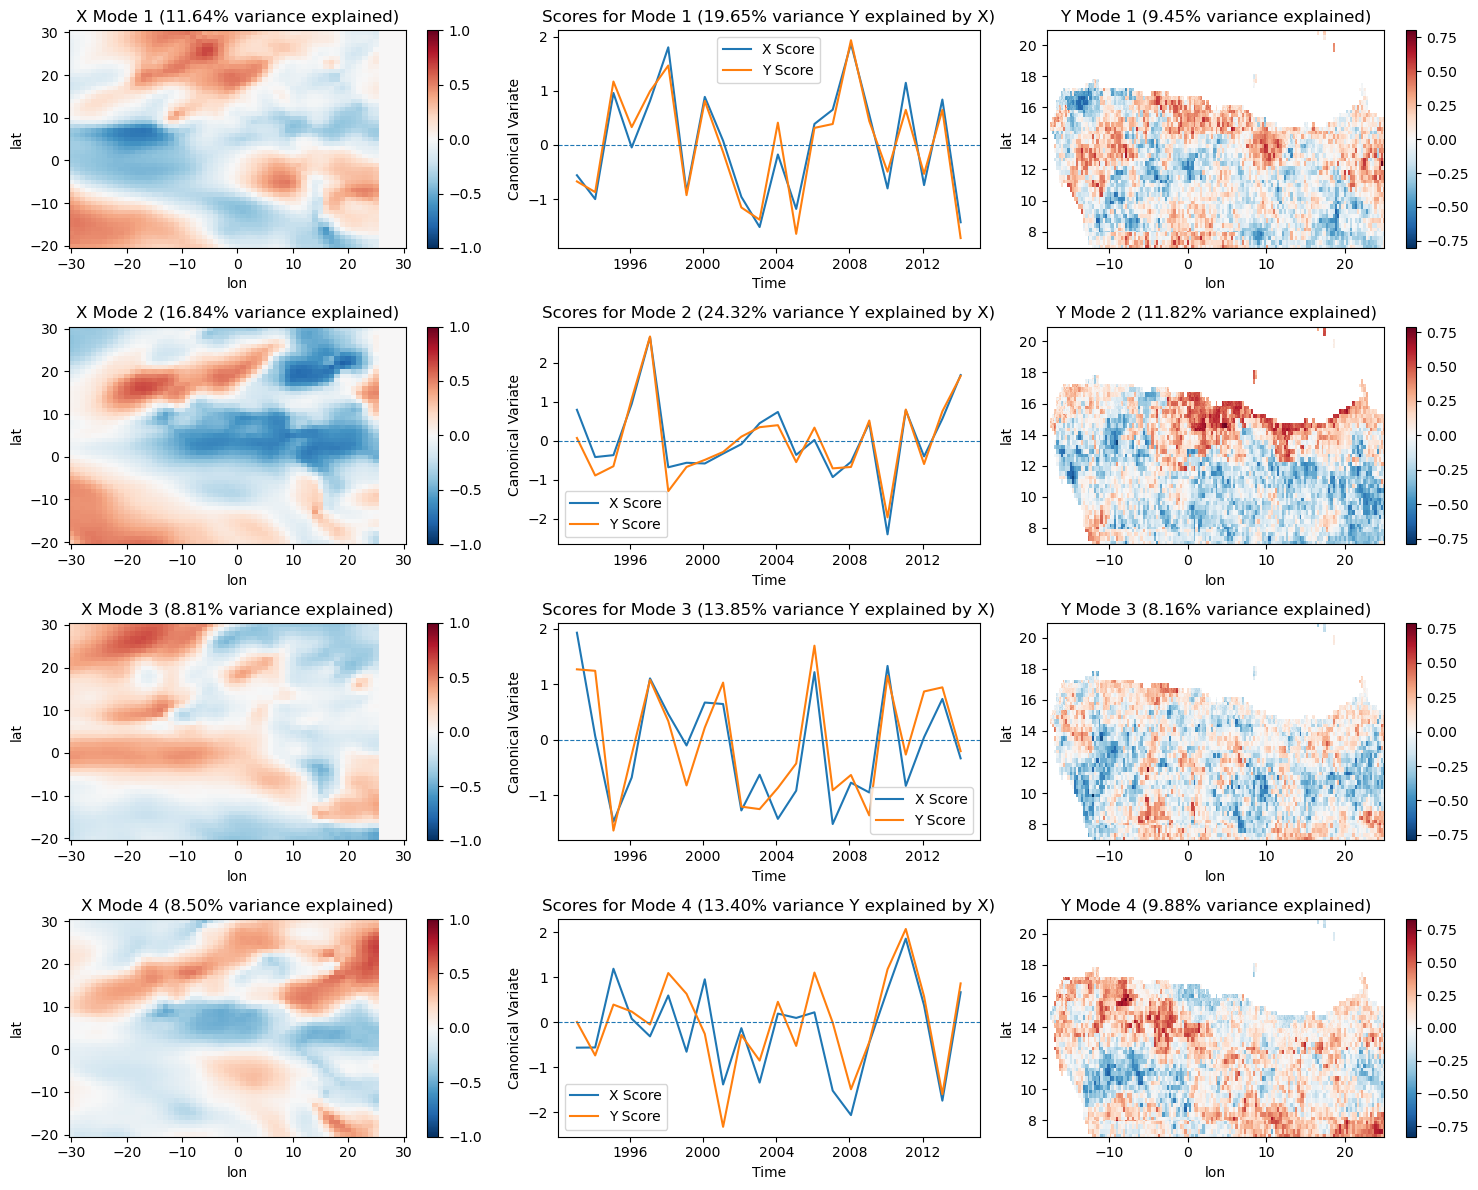

In [49]:
predictors = {}
for i in center_variable:
    predictors[i] = retrieve_single_zone_for_PCR(dir_to_save_model, defined_zone, i, year_start_model, year_end_model, clim_year_start=clim_year_start, clim_year_end=clim_year_end, model=True, month_of_initialization=month_of_initialization, lead_time=lead_time)
    predictor = predictors[i].isel(T = slice(None,-1))
    predictor['T'] = onset.sel(T=slice(str(year_start_model),str(year_end_model)))['T']
    print(f"CCA Modes for model {i}")
    was_cca.plot_cca_results(X=predictor, Y=onset.sel(T=slice(str(year_start_model),str(year_end_model))) , clim_year_start=clim_year_start, clim_year_end=clim_year_end)

#### Cross validation

In [ ]:
hindcast_det_dynam_all = {}
hindcast_prob_dynam_all = {}
for key, predictor in predictors.items():
    predictor = predictor.isel(T = slice(None,-1))
    predictor['T'] = onset.sel(T=slice(str(year_start_model),str(year_end_model)))['T']
    print(key.split(".")[0])
    hindcast_det_dynam_all[key], hindcast_prob_dynam_all[key] = was_cv.cross_validate(was_cca, onset.sel(T=slice(str(year_start_model),str(year_end_model))).sel(T=slice(str(year_start_model),str(year_end_model))), predictor, clim_year_start, clim_year_end)

#### Verification (individual)

###### Deterministic

In [ ]:
score = ['Pearson','MAE']
model_name = "CCA_2nd_Approch"

In [ ]:
cca_scores = {}
tmp = {}
for i in score:
    print(was_verify.scores[i][0])
    for key, hdcst in hindcast_det_dynam_all.items():
        tmp[key] = was_verify.compute_deterministic_score(
            was_verify.get_scores_metadata()[i][5],
            onset.sel(T=slice(str(year_start_model),str(year_end_model))),
            hindcast_det_dynam_all[key]
        )
        was_verify.plot_model_score(tmp[key], i, dir_save_score, f"{key}_{model_name}")
    cca_scores[i] = tmp

###### Probabilistic

In [ ]:
score = ['GROC']

In [ ]:
score = score.append('GROC') if 'GROC' not in score else score
tmp = {}
for i in score:
    print(was_verify.scores[i][0])
    for key, hdcst in hindcast_det_dynam_all.items():
        tmp[key] = was_verify.compute_probabilistic_score(
            was_verify.get_scores_metadata()[i][5],
            onset.sel(T=slice(str(year_start_model),str(year_end_model))),
            hindcast_prob_dynam_all[key],
            clim_year_start,
            clim_year_end)
        was_verify.plot_model_score(tmp[key], i, dir_save_score, f"{key}_{model_name}")
    cca_scores[i] = tmp

#### Forecast (individual)

In [ ]:
forecast_det_dynam_all = {}
forecast_prob_dynam_all = {}
for key, predictor in predictors.items():
    predictor_f = predictor.isel(T=[-1])
    predictor = predictor.isel(T = slice(None,-1))
    predictor['T'] = onset.sel(T=slice(str(year_start_model),str(year_end_model)))['T']
    print(key.split(".")[0])
    forecast_det_dynam_all[key], forecast_prob_dynam_all[key] = was_cca.forecast(onset.sel(T=slice(str(year_start_model),str(year_end_model))), clim_year_start, clim_year_end, predictor, hindcast_det_dynam_all[key], predictor_f)
    plot_prob_forecasts(dir_to_forecast, forecast_prob_dynam_all[key].drop_vars('T').squeeze(), f"{model_name} {season_str}-{forecast}", reverse_cmap=True, labels=fcst_labels)

### MME 2nd-Approach: Statistico-Dynamical

In [ ]:
#### Select some models
best_models = get_best_models(center_variable, cca_scores, metric='MAE', threshold=20, top_n=5, gcm=False)
best_models

In [ ]:
model = WAS_mme_GA(dist_method=dist_method)
all_model_hdcst, all_model_fcst, obs, best_score = process_datasets_for_mme(onset.sel(T=slice(str(year_start_model),str(year_end_model))),hdcsted=hindcast_det_dynam_all, fcsted=forecast_det_dynam_all, gcm=False, ELM_ELR=False,  best_models=best_models, scores=cca_scores, model=False)
was_2nd_mme = WAS_Cross_Validator(n_splits=len(onset.sel(T=slice(str(year_start_model),str(year_end_model))).get_index("T")), nb_omit=2)

In [ ]:
hindcast_det_mme_2nd, hindcast_prob_mme_2nd = was_2nd_mme.cross_validate(model, obs, all_model_hdcst, clim_year_start, clim_year_end)
hdcst_consolidated['snd.approach'] = hindcast_det_mme_2nd

#### Verification

###### Deterministic

In [ ]:
score = ['Pearson','MAE']
model_name = "MME_2nd_Approach"

In [ ]:
for i in score:
    r = was_verify.compute_deterministic_score(
        was_verify.get_scores_metadata()[i][5],
        onset.sel(T=slice(str(year_start_model),str(year_end_model))),
        hindcast_det_mme_2nd
    )
    scores_consolidated[i]['snd.approach'] = r
    was_verify.plot_model_score(r, i, dir_save_score, model_name)

###### Probabilistic

In [ ]:
score = ['GROC']

In [ ]:
score = score.append('GROC') if 'GROC' not in score else score
for i in score:
    print(was_verify.scores[i][0])
    r = was_verify.compute_probabilistic_score(
        was_verify.get_scores_metadata()[i][5],
        onset.sel(T=slice(str(year_start_model),str(year_end_model))),
        hindcast_prob_mme_2nd,
        clim_year_start,
        clim_year_end)
    scores_consolidated[i]['snd.approach'] = r
    was_verify.plot_model_score(r, i, dir_save_score, model_name)

#### Forecast 

In [ ]:
forecast_det_mme_2nd, forecast_prob_mme_2nd = model.forecast(obs, clim_year_start, clim_year_end, all_model_hdcst, hindcast_det_mme_2nd, all_model_fcst)
fcst_consolidated['snd.approach'] = forecast_det_mme_2nd
plot_prob_forecasts(dir_to_forecast, forecast_prob_mme_2nd.drop_vars('T').squeeze(), f"{model_name} {season_str}-{forecast}", reverse_cmap=True, labels=fcst_labels)
gc.collect()

# 3rd - Approach: Observational-based seasonal forecast

In [ ]:
# Filter model names to identify precipitation-related models
variables_reanalysis = ["NOAA.SST"] #[key for key in downloader.ReanalysisName().keys() if "SST" in key]# or "VGRD_850" in key]

# Specify the directory to save downloaded model data
dir_to_save_Reanalysis = f"{dir_s2s}/reanalysis_data/"

# choose sequence corresponding to seasonal forecast targets (JAS season in this case)
season = ["12","01","02"]  # July-August-September forecast period

# Define the observation period (years 1993 to 2016)
year_start = 1990
year_end = 2025

# Set the bounding box for the area of interest (latitude and longitude bounds)
extent = [60, -180, -60, 180]  # [Northern, Western, Southern and Eastern] 

# Specify whether to overwrite existing files when downloading data
force_download = False

In [ ]:
downloader.WAS_Download_Reanalysis(
    dir_to_save_Reanalysis,
    variables_reanalysis,
    year_start,
    year_end,
    extent,
    season, 
    force_download
)

##### Process SST index 

In [ ]:
# Print available SST index
print(list(sst_indices_name.keys()))

In [ ]:
## Choose yours
sst_index_name = ['NINO34','TNA','TSA', 'DMI'] 

# Set your own indices zones ( zones not available in built-in)
my_own_indices_zone = {
                         #'A': ('A', -55, 10, -20, 25),
                         # 'B': ('B', -170, -80, -10, 10),
                         #'C': ('C', -10, 10, 1, 5),
                        }
others_zone = my_own_indices_zone

In [ ]:
# Combine all zones
sst_indices_all = {i: sst_indices_name[i] for i in sst_index_name} 
sst_indices_all.update(my_own_indices_zone) if my_own_indices_zone is not None else {i: sst_indices_name[i] for i in sst_index_name} 

In [ ]:
plot_map([extent[1],extent[3],extent[2],extent[0]], sst_indices = sst_indices_all, title="Index Zone",fig_size=(7,4))

In [ ]:
predictors = compute_sst_indices(dir_to_save_Reanalysis, sst_index_name, variables_reanalysis[0], year_start, year_end, season, clim_year_start, clim_year_end, my_own_indices_zone)

##### Calculate variance inflation factor to see multicolinearity predictor

In [ ]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = predictors.to_dataframe().columns
vif_data["VIF"] = [VIF(predictors.to_dataframe(), i) for i in range(predictors.to_dataframe().shape[1])]
# Print VIF values
print(vif_data)

In [ ]:
# Set a threshold for VIF (e.g., 10)
vif_threshold = 5

In [ ]:
low_vif_predictors = vif_data[vif_data["VIF"] < vif_threshold]["feature"].tolist()
# Filter the predictors to exclude those with high VIF
filtered_predictors = predictors[low_vif_predictors].to_array()
filtered_predictors = filtered_predictors.rename({"variable": "features"}).transpose('T', 'features')
print(low_vif_predictors)

## Initialize WAS_LinearRegression_Model

In [ ]:
# Available core over machine
cpu_count()

In [ ]:
#### Set core number for computation
nb_cores = 4

In [ ]:
# Load class for model, cross-validation and verification
model = WAS_LinearRegression_Model(nb_cores = nb_cores, dist_method=dist_method)

#### Cross validation

In [ ]:
# Instantiate cross-validation
was_cv = WAS_Cross_Validator(n_splits=len(onset.isel(T = slice(None,-1)).get_index("T")), nb_omit=2)

In [ ]:
filtered_predictors_ = filtered_predictors.isel(T = slice(None,-1))
filtered_predictors_['T'] = onset['T']
hindcast_det_obs_seas_mlr, hindcast_prob_obs_seas_mlr = was_cv.cross_validate(model, onset, filtered_predictors_, clim_year_start, clim_year_end)

#### Verification

In [ ]:
score = ['Pearson','MAE']
model_name = "3rd-Approach-MLR"

###### Deterministic

In [ ]:
third_scores = {}
hindcast_det_obsBased_all = {}
for i in score:
    r = was_verify.compute_deterministic_score(
        was_verify.get_scores_metadata()[i][5],
        onset,
        hindcast_det_obs_seas_mlr
    )
    was_verify.plot_model_score(r, i, dir_save_score, model_name)
    third_scores[i] = {'third1.score': r}
hindcast_det_obsBased_all['third1.score'] = hindcast_det_obs_seas_mlr

###### Probabilistic

In [ ]:
score = ['GROC']

In [ ]:
score = score.append('GROC') if 'GROC' not in score else score
hindcast_prob_obsBased_all = {}
for i in score:
    print(was_verify.scores[i][0])
    r = was_verify.compute_probabilistic_score(
        was_verify.get_scores_metadata()[i][5],
        onset,
        hindcast_prob_obs_seas_mlr,
        clim_year_start,
        clim_year_end)
    was_verify.plot_model_score(r, i, dir_save_score, model_name)
    third_scores[i] = {'third1.score': r}
hindcast_prob_obsBased_all['third1.score'] = hindcast_prob_obs_seas_mlr

#### Forecast

In [ ]:
forecast_det_obsBased_all = {}
forecast_prob_obsBased_all = {}
f_predictors = filtered_predictors.isel(T=[-1])
f_predictors['T'] = forecast_det_gcm['T']
forecast_det_mlr, forecast_prob_mlr = model.forecast(onset, clim_year_start, clim_year_end, filtered_predictors_, hindcast_det_obs_seas_mlr, f_predictors)
forecast_det_obsBased_all['third1.score'] = forecast_det_mlr
forecast_prob_obsBased_all['third1.score'] = forecast_prob_mlr
plot_prob_forecasts(dir_to_forecast,forecast_prob_mlr.drop_vars('T').squeeze(), f"{model_name} {season_str}-{forecast}", reverse_cmap=True, labels=fcst_labels)

## Initialize Principal Component Regression with ElasticNet

##### Zone for EOFs  

In [ ]:
# Set your own zones ( zones not available in built-in)
# define zone as dict : {'zone_name_key': ('Explicit_Zone_name', lon_min, lon_max, lat_min, lat_max)} 
zones_for_PCR = {'A': ('A', -150, 150, -45, 45)}

# Set number of modes
n_modes=6

# ElasticNet hyperparameters range
alpha_range = np.logspace(-4, 0.1, 20)
l1_ratio_range = [0.8, 0.9, 0.95, 0.99]

In [ ]:
plot_map([extent[1],extent[3],extent[2],extent[0]], sst_indices = zones_for_PCR, title="Predictors Area",fig_size=(8,6))

In [ ]:
predictor = retrieve_single_zone_for_PCR(dir_to_save_Reanalysis, zones_for_PCR, variables_reanalysis[0], year_start, year_end, season, clim_year_start, clim_year_end)
# Load WAS_EOF Class, try in a cell WAS_EOF? to see all docstring about its methods
eof_model = WAS_EOF(n_modes=n_modes, use_coslat=True, standardize=True)
# Load predictor, compute EOFs and retrieve component, scores and explained variances
s_eofs, s_pcs, s_expvar, _ = eof_model.fit(predictor, dim="T",  clim_year_start=clim_year_start, clim_year_end=clim_year_end)
eof_model.plot_EOF(s_eofs, s_expvar)
gc.collect()

#### Cross-validation

In [ ]:
## Load class for model
regression_model = WAS_ElasticNet_Model(alpha_range = alpha_range, l1_ratio_range = l1_ratio_range, nb_cores = nb_cores, dist_method=dist_method)  # Initialize a linear model
pcr_model = WAS_PCR(regression_model=regression_model, n_modes=n_modes, standardize=False)

In [ ]:
# Compute alpha parameters
alpha, l1_ratio, clusters = regression_model.compute_hyperparameters(onset, s_pcs.isel(T=slice(None,-1)).rename({"mode": "features"}).transpose('T', 'features'))

In [ ]:
## Load class cross-validation
was_cv = WAS_Cross_Validator(n_splits=len(onset.get_index("T")), nb_omit=2)

In [ ]:
hindcast_det_ElasticNet, hindcast_prob_ElasticNet = was_cv.cross_validate(pcr_model, onset, predictor.isel(T=slice(None,-1)), clim_year_start, clim_year_end, alpha=alpha, l1_ratio=l1_ratio)

#### Verification

###### Deterministic

In [ ]:
score = ['Pearson','MAE']
model_name = "PCR with ElasticNet"

In [ ]:
for i in score:
    r = was_verify.compute_deterministic_score(
        was_verify.get_scores_metadata()[i][5],
        onset,
        hindcast_det_ElasticNet
    )
    was_verify.plot_model_score(r, i, dir_save_score, model_name)
    third_scores[i]['third2.score'] = r
hindcast_det_obsBased_all['third2.score'] = hindcast_det_ElasticNet

###### Probabilistic

In [ ]:
score = ['GROC']

In [ ]:
score = score.append('GROC') if 'GROC' not in score else score
for i in score:
    print(was_verify.scores[i][0])
    r = was_verify.compute_probabilistic_score(
        was_verify.get_scores_metadata()[i][5],
        onset,
        hindcast_prob_ElasticNet,
        clim_year_start,
        clim_year_end)
    was_verify.plot_model_score(r, i, dir_save_score, model_name)
    third_scores[i]['third2.score'] = r
hindcast_prob_obsBased_all['third2.score'] = hindcast_prob_ElasticNet

#### Forecast

In [ ]:
f_predictors = predictor.isel(T=[-1])
f_predictors['T'] = forecast_det_gcm['T']
forecast_det_ElasticNet, forecast_prob_ElasticNet = pcr_model.forecast(onset, clim_year_start, clim_year_end, predictor.isel(T=slice(None,-1)), hindcast_det_ElasticNet, f_predictors, alpha=alpha, l1_ratio=l1_ratio)       
forecast_det_obsBased_all['third2.score'] = forecast_det_ElasticNet
forecast_prob_obsBased_all['third2.score'] = forecast_prob_ElasticNet
plot_prob_forecasts(dir_to_forecast, forecast_prob_ElasticNet.drop_vars('T').squeeze(), f"{model_name} {season_str}-{forecast}", reverse_cmap=True, labels=fcst_labels)

### MME Third-Approach: Observational-based seasonal forecast

In [ ]:
#### Select some models
best_models = get_best_models(['third1.score','third2.score'], third_scores, metric='MAE', threshold=20, top_n=2, gcm=False)
best_models

In [ ]:
all_model_hdcst, all_model_fcst, obs, best_score = process_datasets_for_mme(onset, hdcsted=hindcast_det_obsBased_all, fcsted=forecast_det_obsBased_all, gcm=False, ELM_ELR=False,  best_models=best_models, scores=third_scores, model=False)

In [ ]:
was_3rd_mme = WAS_mme_BMA(obs, all_model_hdcst, all_model_fcst, dist_method=dist_method, alpha_=0.5, error_metric_="mae")
hindcast_det_mme_3rd  = was_3rd_mme.compute(draws=500, tune=1000, chains=2, verbose=False)
hindcast_prob_mme_3rd = was_3rd_mme.compute_prob(onset, clim_year_start, clim_year_end, hindcast_det_mme_3rd)
hdcst_consolidated['third.approach'] = hindcast_det_mme_3rd.sel(T=slice(str(year_start_model),str(year_end_model)))

#### Verification

###### Deterministic

In [ ]:
score = ['Pearson','MAE']
model_name = "MME_3rd_Approach"

In [ ]:
for i in score:
    r = was_verify.compute_deterministic_score(
        was_verify.get_scores_metadata()[i][5],
        onset,
        hindcast_det_mme_3rd
    )
    scores_consolidated[i]['third.approach'] = r
    was_verify.plot_model_score(r, i, dir_save_score, model_name)

###### Probabilistic

In [ ]:
score = ['GROC']

In [ ]:
score = score.append('GROC') if 'GROC' not in score else score
for i in score:
    print(was_verify.scores[i][0])
    r = was_verify.compute_probabilistic_score(
        was_verify.get_scores_metadata()[i][5],
        onset,
        hindcast_prob_mme_3rd,
        clim_year_start,
        clim_year_end)
    scores_consolidated[i]['third.approach'] = r
    was_verify.plot_model_score(r, i, dir_save_score, model_name)

#### Forecast

In [ ]:
forecast_det_mme_3rd, forecast_prob_mme_3rd = was_3rd_mme.forecast(obs, clim_year_start, clim_year_end, hindcast_det_mme_3rd)
fcst_consolidated['third.approach'] = forecast_det_mme_3rd
plot_prob_forecasts(dir_to_forecast, forecast_prob_mme_3rd.drop_vars('T').squeeze(), f"{model_name} {season_str}-{forecast}", reverse_cmap=True, labels=fcst_labels)
gc.collect()

# 4th - Analog-based seasonal forecast

## Initialize WAS_Analog class

In [ ]:
## Load class for model, cross-validation and verification
model = WAS_Analog(f"{dir_s2s}/analog", 
                    1990, 2025,"NOAA.SST", "NCEP_2.SST",
                    method_analog ="som", 
                    month_of_initialization=2,
                    clim_year_start=clim_year_start, 
                    clim_year_end=clim_year_end,
                    # define_extent = None,
                    index_compute = ['NINO34', 'NINO12', 'NINO3', 'NINO4', 'NINO_Global', 'TNA', 'TSA',  'WTIO', 'SETIO', 'MB','TASI', 'DMI','M1','M2','M3','M4'],
                    some_grid_size = (3, 3),
                    some_learning_rate=0.1,
                    some_neighborhood_function='gaussian',
                    some_sigma=1,
                    dist_method=dist_method
                    )

#### Cross-validation

In [ ]:
was_analog_cv = WAS_Cross_Validator(n_splits=len(onset.get_index("T")), nb_omit=2)

In [ ]:
hindcast_analog_det, hindcast_analog_prob = was_analog_cv.cross_validate(model, onset, clim_year_start=clim_year_start, clim_year_end=clim_year_end)
hdcst_consolidated['fourth.approach'] = hindcast_analog_det.sel(T=slice(str(year_start_model),str(year_end_model)))

#### Verification

###### Deterministic

In [ ]:
score = ['Pearson','MAE']
model_name = "analog_method"

In [ ]:
for i in score:
    r = was_verify.compute_deterministic_score(
        was_verify.get_scores_metadata()[i][5],
        onset,
        hindcast_analog_det
    )
    scores_consolidated[i]['fourth.approach'] = r
    was_verify.plot_model_score(r, i, dir_save_score, model_name)

###### Probabilistic

In [ ]:
score = ['GROC']

In [ ]:
score = score.append('GROC') if 'GROC' not in score else score
for i in score:
    print(was_verify.scores[i][0])
    r = was_verify.compute_probabilistic_score(
        was_verify.get_scores_metadata()[i][5],
        onset,
        hindcast_analog_prob,
        clim_year_start,
        clim_year_end)
    scores_consolidated[i]['fourth.approach'] = r
    was_verify.plot_model_score(r, i, dir_save_score, model_name)

#### Forecast

In [ ]:
ddd, similar_years, forecast_det_analog, forecast_prob_analog = model.forecast(onset, clim_year_start, clim_year_end, hindcast_analog_det, forecast)
fcst_consolidated['fourth.approach'] = forecast_det_analog
plot_prob_forecasts(dir_to_forecast, forecast_prob_analog.drop_vars('T').squeeze(), f"{model_name} {season_str}-{forecast}", reverse_cmap=True, labels=fcst_labels)

In [ ]:
## Analysis SST evolution
model.composite_plot(onset, clim_year_start, clim_year_end, hindcast_analog_det, plot_predictor=True)

# Consolidated Forecasts

In [ ]:
best_models = ["first.approach", 'snd.approach', 'third.approach', 'fourth.approach']

#### Cross-validation

In [ ]:
all_model_hdcst, all_model_fcst, obs, best_score = process_datasets_for_mme(onset.sel(T=slice(str(year_start_model),str(year_end_model))),hdcsted=hdcst_consolidated, fcsted=fcst_consolidated, gcm=False, ELM_ELR=False,  Prob=True, best_models=best_models, scores=scores_consolidated, model=False)

In [ ]:
was_mme = WAS_Min2009_ProbWeighted()
hindcast_prob, forecast_prob  = was_mme.compute(obs, all_model_hdcst, all_model_fcst, best_score, threshold=0.5, complete=True)

#### Consolidated forecast Skill

##### Probabilistic

In [ ]:
score = ['GROC']

In [ ]:
for i in score:
    print(was_verify.scores[i][0])
    r = was_verify.compute_probabilistic_score(
        was_verify.get_scores_metadata()[i][5],
        onset.sel(T=slice(str(year_start_model),str(year_end_model))),
        hindcast_prob,
        clim_year_start,
        clim_year_end) 
    was_verify.plot_model_score(r, i, dir_save_score, model_name)

##### Plot Roc curves

In [ ]:
was_verify.plot_roc_curves(model_name, dir_save_score, onset.sel(T=slice(str(year_start_model),str(year_end_model))), hindcast_prob, clim_year_start, clim_year_end, n_bootstraps=100, ci=0.95)

In [ ]:
was_verify.reliability_diagram(model_name, dir_save_score, onset.sel(T=slice(str(year_start_model),str(year_end_model))), hindcast_det_prob, clim_year_start, clim_year_end)

### Forecast 

In [ ]:
plot_prob_forecasts(dir_to_forecast, forecast_prob.drop_vars('T').squeeze(), f"{model_name} {season_str}-{forecast}", reverse_cmap=True, labels=fcst_labels)

#### Save Forecast for future evaluation

In [ ]:
# forecast_det.to_netcdf(f'{dir_to_forecast}/Forecast_Det{season_str}_{forecast}.nc')

In [ ]:
forecast_prob.to_netcdf(f'{dir_to_forecast}/Forecast_Prob{season_str}_{forecast}.nc')

###       ------------------------------------------------------- END --------------------------------------------------

In [ ]:
!jupyter nbconvert --to pdf --no-input ./01_MME_Onset.ipynb